# Part 1

In [5]:
import pandas as pd
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 6

import seaborn as sns
sns.set()

pd.options.display.float_format = '{:.5f}'.format

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from pathlib import Path
from sys import path

notebook_path = Path.cwd()
SITE = notebook_path.parent
path.append(str(SITE.absolute()))
from libs.helpers import *

In [8]:
ticker = "VNI"
filename = SITE / f'investing/data/exports/indices/{ticker}.csv'
df = pd.read_csv(filename, infer_datetime_format=True)[:-1]
df['Volume'] = df['Volume'].astype(int)
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

In [9]:
df_close = df['Close']
df_returns = np.log(df_close).diff()
df_returns.dropna(inplace=True)
len(df_returns)

5751

<Axes: title={'center': 'VNI Returns'}, xlabel='Date'>

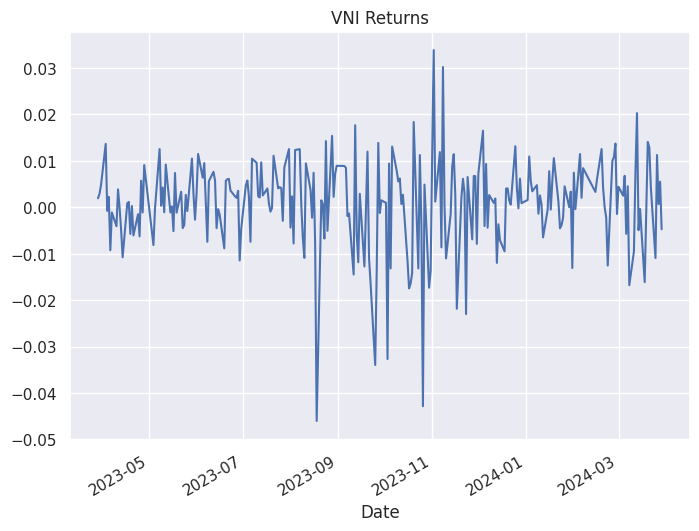

In [10]:
df_returns[-252:].plot(title=f'{ticker} Returns')

In [11]:
df_returns.describe()

count   5751.00000
mean       0.00044
std        0.01458
min       -0.07656
25%       -0.00562
50%        0.00062
75%        0.00747
max        0.06656
Name: Close, dtype: float64

In [12]:
from scipy import stats

In [13]:
n , minmax, mean, var, skew, kurt = stats.describe(df_returns)
mini, maxi = minmax
std = var ** 0.5

(array([  10.,   12.,   16.,   71.,  100.,  183.,  581., 1664., 1921.,
         797.,  220.,   97.,   66.,    2.,   11.]),
 array([-0.07655673, -0.06701554, -0.05747435, -0.04793316, -0.03839197,
        -0.02885077, -0.01930958, -0.00976839, -0.0002272 ,  0.00931399,
         0.01885518,  0.02839637,  0.03793757,  0.04747876,  0.05701995,
         0.06656114]),
 <BarContainer object of 15 artists>)

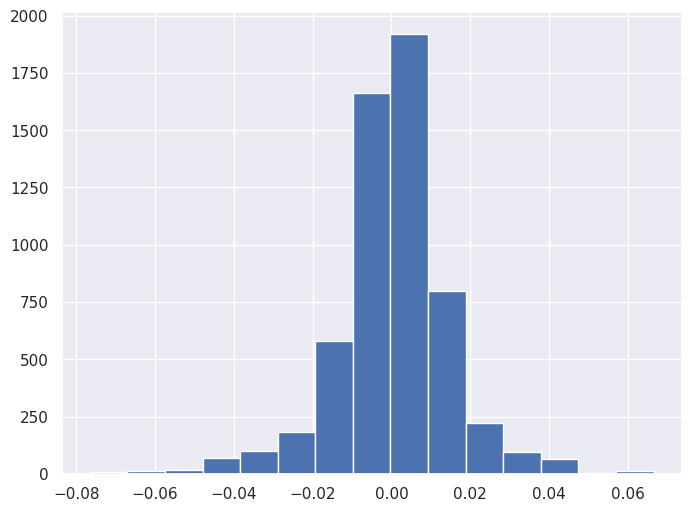

In [14]:
plt.hist(df_returns, bins=15)

In [15]:
mean, std, n

(0.00044118488736307165, 0.014577750363540986, 5751)

In [16]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)  # generate random numbers from a normal distribution

(array([   8.,   21.,   69.,  232.,  499.,  797., 1124., 1170.,  876.,
         574.,  243.,  104.,   25.,    7.,    2.]),
 array([-0.05208812, -0.04468877, -0.03728941, -0.02989006, -0.0224907 ,
        -0.01509134, -0.00769199, -0.00029263,  0.00710672,  0.01450608,
         0.02190544,  0.02930479,  0.03670415,  0.0441035 ,  0.05150286,
         0.05890222]),
 <BarContainer object of 15 artists>)

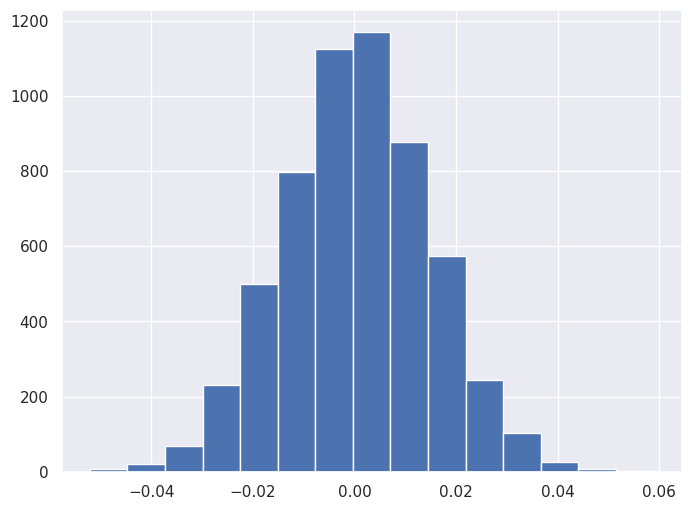

In [17]:
plt.hist(x, bins=15)

In [18]:
x_test = stats.kurtosistest(x)
x_test

KurtosistestResult(statistic=0.8912390850863432, pvalue=0.37280092028015976)

In [19]:
df_test = stats.kurtosistest(df_returns)
# df_test = stats.kurtosistest(df_returns[-252:])
df_test

KurtosistestResult(statistic=21.232268665276457, pvalue=4.808443398212502e-100)

In [20]:
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"VNI: {df_test[0]:13.2f}{df_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:             0.89          0.3728
VNI:         21.23          0.0000


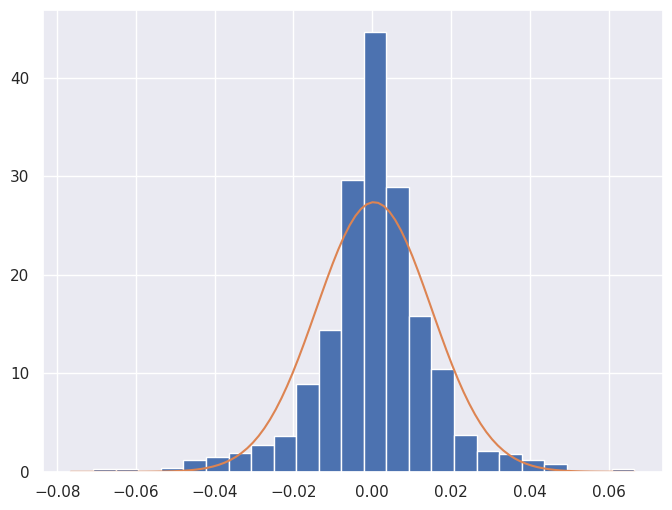

In [21]:
plt.hist(df_returns, bins = 25, edgecolor='w', density= True)
# plt.hist(df_returns[-252:], bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std))

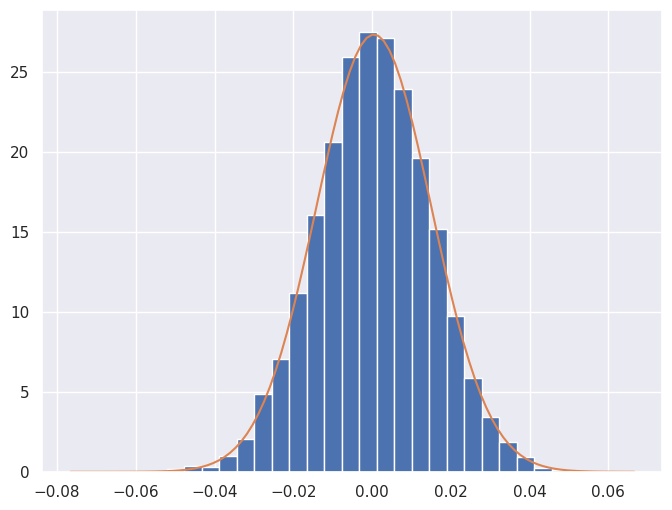

In [22]:
plt.hist(x, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))

In [23]:
stats.ttest_1samp(df_returns, 0, alternative='two-sided')

TtestResult(statistic=2.295101000695263, pvalue=0.02176317896713092, df=5750)

In [24]:
stats.ttest_1samp(df_returns.sample(252), 0, alternative='two-sided')


TtestResult(statistic=0.6406953559757408, pvalue=0.5223051292266243, df=251)

# Part 2

In [25]:
df_close = pd.DataFrame(df_close, columns=['Close'])
df_close['lag1'] = df_close.Close.shift(1)
df_close['lag2'] = df_close.Close.shift(2)
df_close.dropna(inplace = True)
df_close.head()

,Close,lag1,lag2
Date,,,
2000-08-04,105.20000,103.38000,101.55000
2000-08-07,106.92000,105.20000,103.38000
2000-08-09,108.64000,106.92000,105.20000
2000-08-11,110.36000,108.64000,106.92000
2000-08-14,112.08000,110.36000,108.64000


In [26]:
lr = np.linalg.lstsq(df_close[['lag1', 'lag2']], df_close.Close, rcond=None)[0]

In [27]:
df_close['predict'] = np.dot(df_close[['lag1', 'lag2']], lr)
df_close.head()

,Close,lag1,lag2,predict
Date,,,,
2000-08-04,105.20000,103.38000,101.55000,103.65135
2000-08-07,106.92000,105.20000,103.38000,105.47017
2000-08-09,108.64000,106.92000,105.20000,107.17627
2000-08-11,110.36000,108.64000,106.92000,108.89649
2000-08-14,112.08000,110.36000,108.64000,110.61671


<Axes: xlabel='Date'>

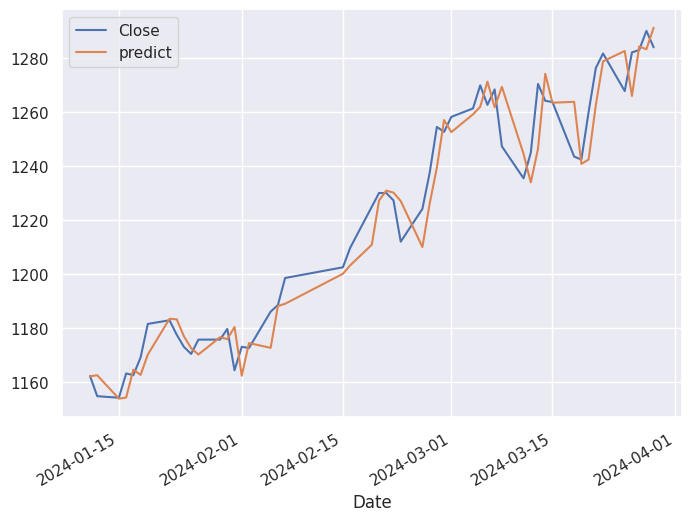

In [28]:
# df_close.iloc[-252:][['Close', 'predict']].plot()
df_close.iloc[-52:][['Close', 'predict']].plot()